In [1]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

In [4]:
def muestra(img):
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.xticks([]),plt.yticks([]) #Ocultar ejes
    plt.show()

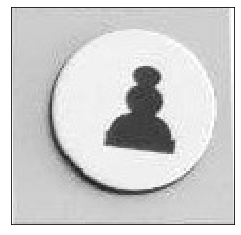

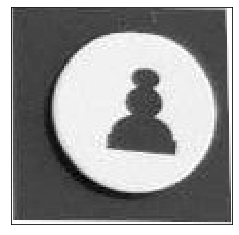

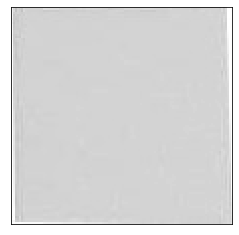

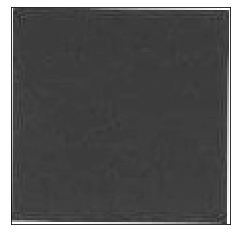

In [71]:
peon_a= cv2.imread("imgs/tests/negra_12a.jpg",0)   
peon_b =cv2.imread("imgs/tests/negra_12b.jpg",0)  
vacia_a= cv2.imread("imgs/tests/a.jpg",0)   
vacia_b =cv2.imread("imgs/tests/b.jpg",0)    
muestra(peon_a)
muestra(peon_b)
muestra(vacia_a)
muestra(vacia_b)

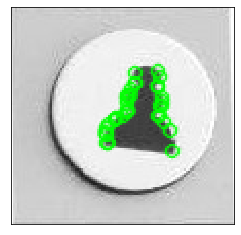

In [19]:
orb = cv2.ORB_create(edgeThreshold=30)
kp, des = orb.detectAndCompute(peon_a, None)
muestra(cv2.drawKeypoints(peon_a, kp, None, color=(0,255,0), flags=0))


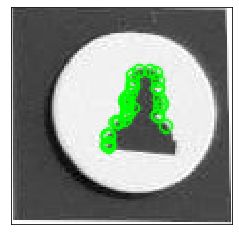

In [18]:
orb = cv2.ORB_create(edgeThreshold=30)
kp, des = orb.detectAndCompute(peon_b, None)
muestra(cv2.drawKeypoints(peon_b, kp, None, color=(0,255,0), flags=0))

In [64]:
def getDescriptors():
    orb = cv2.ORB_create(edgeThreshold=20)
    descriptors = []
    for i in range(1,13):
        img = cv2.imread("imgs/clases/"+str(i)+".jpg",0) 
        _,d = orb.detectAndCompute(img, None)  
        descriptors.append(d)
    return descriptors

In [73]:
def distanciaMedia(matches):
    if len(matches)>0:
        return sum(map(lambda m: m.distance,matches)) / len(matches)
    else:
        return 9999999
    

In [78]:
def identificaFigura(img, descriptors):
    orb = cv2.ORB_create(edgeThreshold=20)
    _, desO = orb.detectAndCompute(img, None)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    clase = 0
    best = 100
    for i,des in enumerate(descriptors, start=1):
        if type(des) is np.ndarray:
            matches = bf.match(desO,des)
            matches = sorted(matches, key = lambda x:x.distance)
            media = distanciaMedia(matches[:30])
            
            if media < best:
                    best = media
                    clase = i
    
    return clase



In [75]:
def creaTablero (casillas):
    descriptors = getDescriptors()
    res = np.zeros(8,8)
    for i in range(8):
        for j in range(8):
            res[i,j] = identificaFigura(casillas[i,j], descriptors)
    
    return res



In [77]:
ds = getDescriptors()
identificaFigura(vacia_a, ds)

(100, 0)